# Mobile games A/B testing

### Importing Dataset and priliminary observations

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("cookie_cats.csv")
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [32]:
# Check null values

data.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [33]:
# Balance of the data

data.groupby('version').count()
# data['version'].value_counts()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


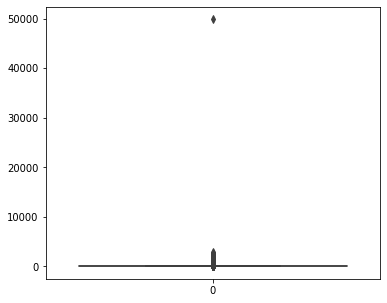

In [34]:
# Box plot

plt.figure(figsize=(6,5))
sns.boxplot(data['sum_gamerounds'])
plt.show()

In [35]:
# There is an outlier who has played 50000 game rounds in the first week

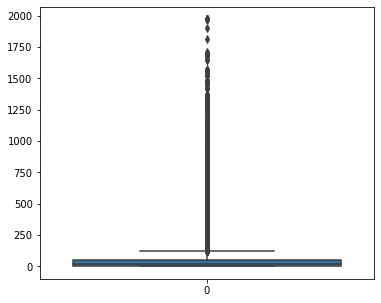

In [36]:
# Remove outlier

# data['sum_gamerounds'].quantile(0.75)
q1 = data['sum_gamerounds'].quantile(0.01)
q3 = data['sum_gamerounds'].quantile(0.99)

IQR = q3-q1

up_limit = q3+3*IQR
low_limit = q1-3*IQR

data[data['sum_gamerounds']>up_limit]
data.loc[data['sum_gamerounds']>up_limit, "sum_gamerounds"] = up_limit-1

plt.figure(figsize=(6,5))
sns.boxplot(data['sum_gamerounds'])
plt.show()

In [37]:
data['sum_gamerounds'].describe()

count    90189.000000
mean        51.306024
std        102.113185
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       1971.000000
Name: sum_gamerounds, dtype: float64

In [38]:
# Number of players for each game rounds

d1 = data.groupby('sum_gamerounds')['userid'].count()
df1 = pd.DataFrame(d1)

df1['cum_sum'] = df1['userid'].cumsum()
df1.head()

df1['cum_sum_perc'] = np.round((df1['cum_sum'] / df1['userid'].sum())*100,1)
df1.head()

# df1[df1['cum_sum_perc'] > 50].head()
# df1[df1['cum_sum_perc'] > 75].head()

,userid,cum_sum,cum_sum_perc
sum_gamerounds,,,
0,3994,3994,4.4
1,5538,9532,10.6
2,4606,14138,15.7
3,3958,18096,20.1
4,3629,21725,24.1


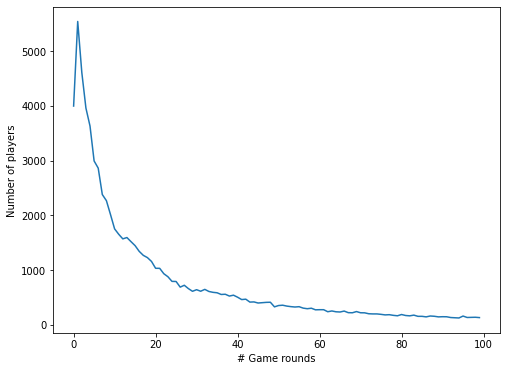

In [39]:
# Plot graph who has played 0 to 100 games within first week playing the game

plt.figure(figsize=(8,6))
plt.plot(d1[:100])
plt.xlabel("# Game rounds")
plt.ylabel("Number of players")
plt.show()

In [40]:
# Large number of players play small number of rounds

### Analysing 1-day retention stats

In [41]:
# Overall 1-day retention

one_day_ret = data['retention_1'].sum() / data['retention_1'].count()
print(one_day_ret)
print("===================================")

# 1-day retention group wise

print(data.groupby('version')['retention_1'].mean())

0.4452095044850259
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64


In [42]:
# There is a slight decrease in gate_40 when compared to gate_30

In [43]:
# Bootstrapping the data with replacement

boot_1dr = []

for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1dr.append(boot_mean)
    
boot_1dr = pd.DataFrame(boot_1dr)
boot_1dr.head()

version,gate_30,gate_40
retention_1,0.450190,0.442403
retention_1,0.452210,0.438054
retention_1,0.448194,0.442985
retention_1,0.450718,0.443092
retention_1,0.452988,0.445225


<Figure size 576x432 with 0 Axes>

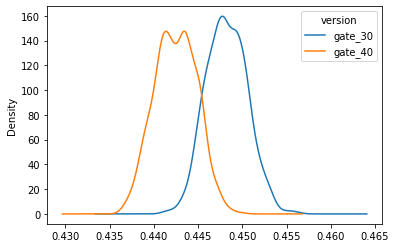

In [44]:
plt.figure(figsize=(8,6))
boot_1dr.plot(kind='density')
plt.show()

In [45]:
# There is some evidence of difference between the 2 columns.
# Plot the difference between gate_30 and gate_40

boot_1dr['diff'] = ((boot_1dr['gate_30'] - boot_1dr['gate_40']) / boot_1dr['gate_40'])*100
boot_1dr.head()

version,gate_30,gate_40,diff
retention_1,0.450190,0.442403,1.760063
retention_1,0.452210,0.438054,3.231730
retention_1,0.448194,0.442985,1.175854
retention_1,0.450718,0.443092,1.720959
retention_1,0.452988,0.445225,1.743530


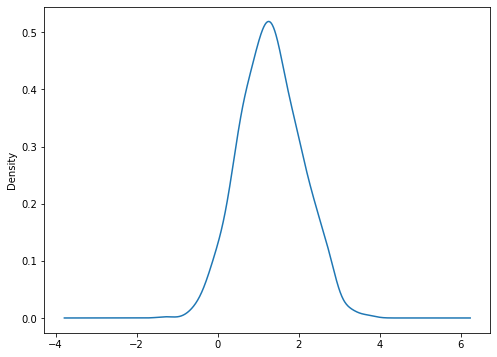

Probability that 1-day retention is greater when gate is 30: 0.959


In [46]:
plt.figure(figsize=(8,6))
boot_1dr['diff'].plot(kind='density')
plt.show()

print("===================================================================")
print("Probability that 1-day retention is greater when gate is 30:", (boot_1dr['diff']>0).mean())

In [47]:
# 97% of the distribution is above 0 and in favor of gate at level 30

### Analysing 7-day retention stats

In [48]:
# 7-day retention group wise

data.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [49]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [50]:
boot_7dr = []

for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7dr.append(boot_mean)
    
boot_7dr = pd.DataFrame(boot_7dr)
boot_7dr.head()

version,gate_30,gate_40
retention_7,0.190958,0.182384
retention_7,0.189374,0.183473
retention_7,0.190144,0.181736
retention_7,0.192039,0.183275
retention_7,0.190055,0.181832


<Figure size 576x432 with 0 Axes>

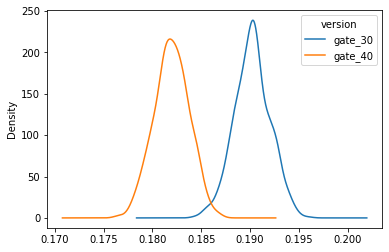

In [51]:
plt.figure(figsize=(8,6))
boot_7dr.plot(kind='density')
plt.show()

In [52]:
boot_7dr['diff'] = ((boot_7dr['gate_30'] - boot_7dr['gate_40']) / boot_7dr['gate_40'])*100
boot_7dr.head()

version,gate_30,gate_40,diff
retention_7,0.190958,0.182384,4.700757
retention_7,0.189374,0.183473,3.216237
retention_7,0.190144,0.181736,4.626554
retention_7,0.192039,0.183275,4.782123
retention_7,0.190055,0.181832,4.521980


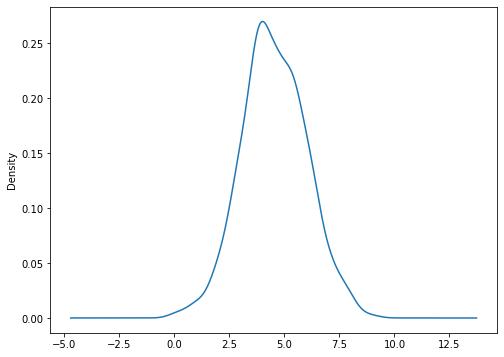

Probability that 7-day retention is greater when gate is 30: 0.999


In [53]:
plt.figure(figsize=(8,6))
boot_7dr['diff'].plot(kind='density')
plt.show()

print("===================================================================")
print("Probability that 7-day retention is greater when gate is 30:", (boot_7dr['diff']>0).mean())

### Conclusion

In [54]:
# From the above 2 analysis, it is clear that the retention rate is higher when the gate is at level 30 than when it is at level 40

In [55]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [69]:
# Paired t-test -> Retention 1

from scipy.stats import ttest_rel

g30_r1 = data['retention_1'][data['version']=='gate_30']

g40_r1 = data['retention_1'][data['version']=='gate_40']

min_length = min(len(g30_r1), len(g40_r1))

if len(g30_r1) > min_length:
    g30_r1 = g30_r1.sample(min_length, random_state=0, replace=True)
elif len(g40_r1) > min_length:
    g40_r1 = g40_r1.sample(min_length, random_state=0, replace=True)

g30_r1 = pd.array(g30_r1.astype(int))
g40_r1 = pd.array(g40_r1.astype(int))

result = ttest_rel(g30_r1, g40_r1)
print(result)

Ttest_relResult(statistic=2.6508272429670465, pvalue=0.00803231931009956)


In [68]:
# Paired t-test -> Retention 7

from scipy.stats import ttest_rel

g30_r7 = data['retention_7'][data['version']=='gate_30']

g40_r7 = data['retention_7'][data['version']=='gate_40']

min_length = min(len(g30_r7), len(g40_r7))

if len(g30_r7) > min_length:
    g30_r7 = g30_r7.sample(min_length, random_state=0, replace=True)
elif len(g40_r7) > min_length:
    g40_r7 = g40_r7.sample(min_length, random_state=0, replace=True)

g30_r7 = pd.array(g30_r7.astype(int))
g40_r7 = pd.array(g40_r7.astype(int))

result2 = ttest_rel(g30_r7, g40_r7)
print(result2)

Ttest_relResult(statistic=3.67568125063396, pvalue=0.00023749287176431076)


In [67]:
# p-score < 0.05 suggesting that we reject the null hypothesis and there is a significant difference in player retention between 2 groups